<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating Classification Models on Humor Styles Data

---

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Humor Styles" survey.

This survey is designed to evaluate what "style" of humor subjects have. Your goal will be to classify gender using the responses on the survey.

## Humor styles questions encoding reference

### 32 questions:

Subjects answered **32** different questions outlined below:

    1. I usually don't laugh or joke with other people.
    2. If I feel depressed, I can cheer myself up with humor.
    3. If someone makes a mistake, I will tease them about it.
    4. I let people laugh at me or make fun of me at my expense more than I should.
    5. I don't have to work very hard to make other people laugh. I am a naturally humorous person.
    6. Even when I'm alone, I am often amused by the absurdities of life.
    7. People are never offended or hurt by my sense of humor.
    8. I will often get carried away in putting myself down if it makes family or friends laugh.
    9. I rarely make other people laugh by telling funny stories about myself.
    10. If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better.
    11. When telling jokes or saying funny things, I am usually not concerned about how other people are taking it.
    12. I often try to make people like or accept me more by saying something funny about my own weaknesses, blunders, or faults.
    13. I laugh and joke a lot with my closest friends.
    14. My humorous outlook on life keeps me from getting overly upset or depressed about things.
    15. I do not like it when people use humor as a way of criticizing or putting someone down.
    16. I don't often say funny things to put myself down.
    17. I usually don't like to tell jokes or amuse people.
    18. If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up.
    19. Sometimes I think of something that is so funny that I can't stop myself from saying it, even if it is not appropriate for the situation.
    20. I often go overboard in putting myself down when I am making jokes or trying to be funny.
    21. I enjoy making people laugh.
    22. If I am feeling sad or upset, I usually lose my sense of humor.
    23. I never participate in laughing at others even if all my friends are doing it.
    24. When I am with friends or family, I often seem to be the one that other people make fun of or joke about.
    25. I donít often joke around with my friends.
    26. It is my experience that thinking about some amusing aspect of a situation is often a very effective way of coping with problems.
    27. If I don't like someone, I often use humor or teasing to put them down.
    28. If I am having problems or feeling unhappy, I often cover it up by joking around, so that even my closest friends don't know how I really feel.
    29. I usually can't think of witty things to say when I'm with other people.
    30. I don't need to be with other people to feel amused. I can usually find things to laugh about even when I'm by myself.
    31. Even if something is really funny to me, I will not laugh or joke about it if someone will be offended.
    32. Letting others laugh at me is my way of keeping my friends and family in good spirits.

---

### Response scale:

For each question, there are 5 possible response codes ("likert scale") that correspond to different answers. There is also a code that indicates there is no response for that subject.

    1 == "Never or very rarely true"
    2 == "Rarely true"
    3 == "Sometimes true"
    4 == "Often true"
    5 == "Very often or always true
    [-1 == Did not select an answer]
    
---

### Demographics:

    age: entered as as text then parsed to an interger.
    gender: chosen from drop down list (1=male, 2=female, 3=other, 0=declined)
    accuracy: How accurate they thought their answers were on a scale from 0 to 100, answers were entered as text and parsed to an integer. They were instructed to enter a 0 if they did not want to be included in research.	

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### 1. Load the data and perform any EDA and cleaning you think is necessary.

It is worth reading over the description of the data columns above for this.

In [2]:
hsq = pd.read_csv('./humor_styles/hsq_data.csv')
df = pd.DataFrame(hsq)

In [3]:
hsq.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [4]:
hsq.isnull().sum() #no cleaning necessary 

Q1               0
Q2               0
Q3               0
Q4               0
Q5               0
Q6               0
Q7               0
Q8               0
Q9               0
Q10              0
Q11              0
Q12              0
Q13              0
Q14              0
Q15              0
Q16              0
Q17              0
Q18              0
Q19              0
Q20              0
Q21              0
Q22              0
Q23              0
Q24              0
Q25              0
Q26              0
Q27              0
Q28              0
Q29              0
Q30              0
Q31              0
Q32              0
affiliative      0
selfenhancing    0
agressive        0
selfdefeating    0
age              0
gender           0
accuracy         0
dtype: int64

### 2. Set up a predictor matrix to predict `gender` (only male vs. female)

Choice of predictors is up to you. Justify which variables you include.

In [5]:
hsq['gender'].unique()

array([2, 1, 3, 0])

In [6]:
#drop 'gender' = {3=other, 0=declined}

# df = hsq[hsq['gender'] != 0] or hsq['gender'] != 3]
df = hsq[hsq['gender'] != 0][hsq['gender'] != 3]

/Users/Abdullah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [7]:
#choose features with correlation >= 0.1 with 'gender'

a_mask = abs(df.corr()['gender']) >= 0.1
df.corr()['gender'][a_mask]

Q7        0.131196
Q11      -0.145432
Q15       0.225276
Q19      -0.105380
Q20      -0.112033
Q31       0.124171
gender    1.000000
Name: gender, dtype: float64

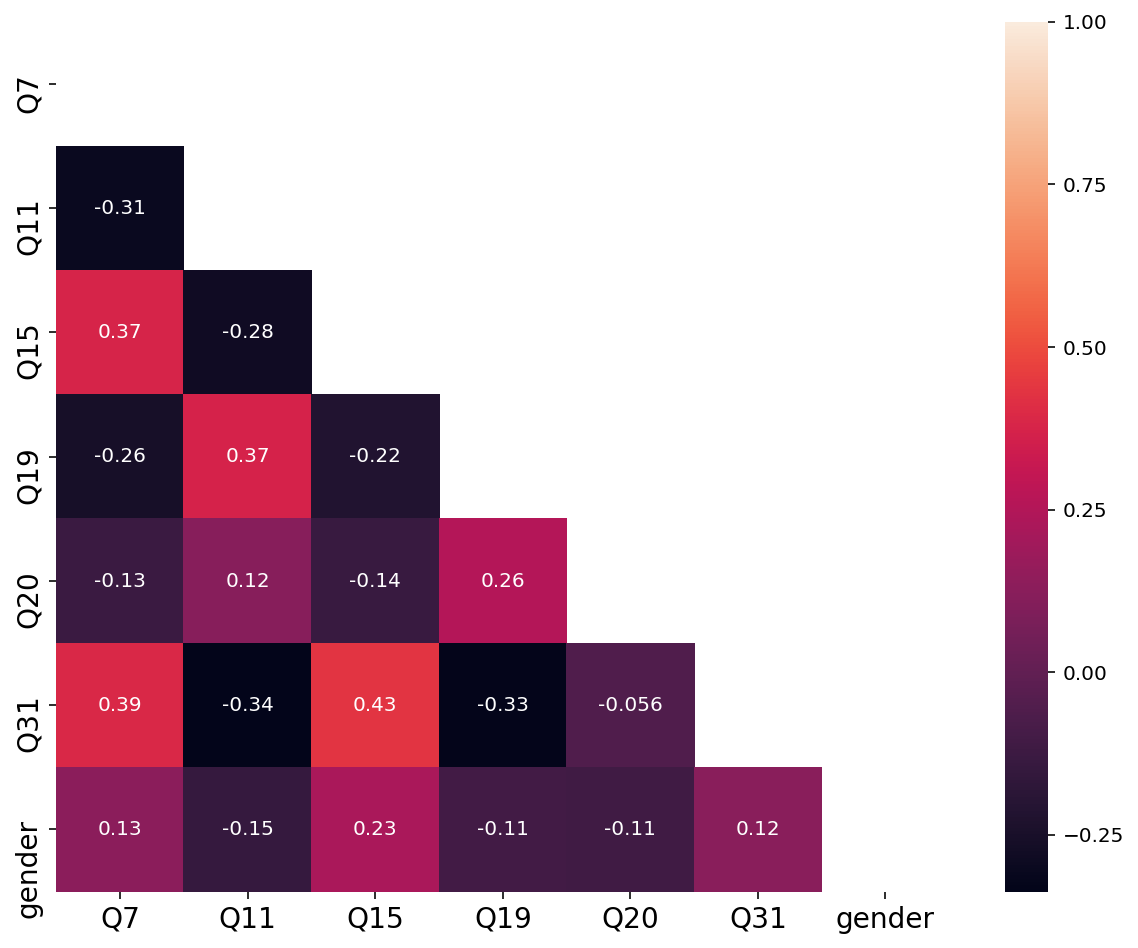

In [8]:
#get a list of feature to be used
features = df.corr()['gender'][a_mask].index.tolist()

#plot a heatmap for correlation
corr = df[features].corr()

fig, ax = plt.subplots(figsize=(10,8))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [9]:
#drop 'gender' from list 'features'
features.remove('gender')

#construct X, predictor matrix, and thier labels
X = df[features]
y = df['gender']

### 3. Fit a Logistic Regression model and compare your cross-validated accuracy to the baseline.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  cross_val_score , cross_val_predict
from sklearn.model_selection import train_test_split

In [11]:
lr_model = LogisticRegression()

In [12]:
basline_score = y.value_counts()[1] / len(y)
basline_score

0.5491493383742911

In [13]:
cv_score = cross_val_score(lr_model, X, y, cv=4)

/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
cv_score > basline_score 
#the model is better the the baseline

array([ True,  True,  True,  True])

### 4. Create a 50-50 train-test split. Fit the model on the training data and get the predictions and predicted probabilities on the test data.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, stratify= y, shuffle= True)
lr_model.fit(X_train, y_train)

/Users/Abdullah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
lr_model.score(X_train, y_train)

0.6370510396975425

In [17]:
lr_model.score(X_test, y_test)

0.5935727788279773

In [18]:
y_preds =pd.Series(lr_model.predict(X))
y_preds.value_counts()

1    646
2    412
dtype: int64

In [19]:
preds_prob = pd.DataFrame(lr_model.predict_proba(X_test), columns=['male','female']) 
preds_prob.head()

,male,female
0,0.340538,0.659462
1,0.728305,0.271695
2,0.771544,0.228456
3,0.709389,0.290611
4,0.343761,0.656239


### 5. Manually calculate the true positives, false positives, true negatives, and false negatives.

In [20]:
tp = np.sum((y == 2) & (y_preds == 2))
fp = np.sum((y == 1) & (y_preds== 2))
tn = np.sum((y == 1) & (y_preds == 1))
fn = np.sum((y == 2) & (y_preds == 1))
print("true positives:", tp)
print("false positives:", fp)
print("true negatives:", tn) 
print("false negatives:", fn)
print("Number of classification errors:", fp+fn)

true positives: 192
false positives: 215
true negatives: 359
false negatives: 279
Number of classification errors: 494


### 6. Construct the confusion matrix. 

In [21]:
from sklearn.metrics import confusion_matrix
C_M = confusion_matrix(y, y_preds)
print(C_M)

[[410 171]
 [236 241]]


### 7. Print out the false positive count as you change your threshold for predicting label 1.

In [22]:
Y_pp = pd.DataFrame(lr_model.predict_proba(X_test), columns=['male','female']) 
Y_pp.head()

,male,female
0,0.340538,0.659462
1,0.728305,0.271695
2,0.771544,0.228456
3,0.709389,0.290611
4,0.343761,0.656239


In [23]:
Y_pp['male'].mean(), Y_pp['female'].mean()

(0.5551325602410256, 0.4448674397589746)

In [24]:
threshold = Y_pp['male'].mean()

Y_pp['predFP'] = [1 if i >= threshold - 0.1 else 0 for i in Y_pp['female'].values]

print('false positves:', Y_pp.predFP.sum())

false positves: 257


### 8. Plot an ROC curve using your predicted probabilities on the test data.

Calculate the area under the curve.

> *Hint: go back to the lesson to find code for plotting the ROC curve.*

In [25]:
from sklearn.metrics import roc_curve, auc

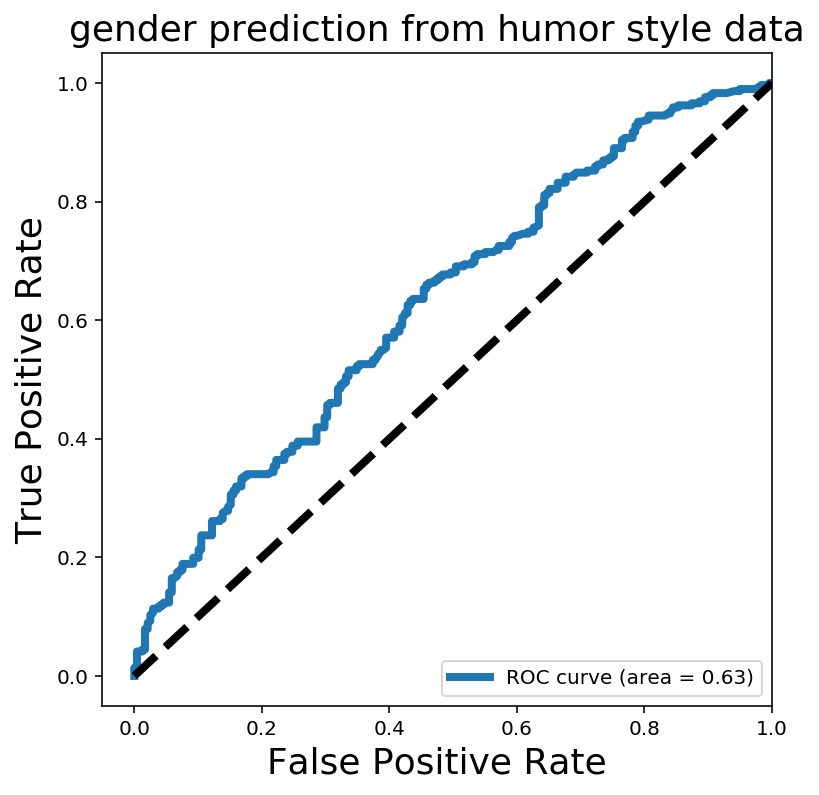

In [26]:
# For class 1, find the area under the curve
fpr, tpr, threshold = roc_curve(y_test, Y_pp.male, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (male)
plt.figure(figsize=[6,6])               # fig, ax = plt.figure(figsize=[6,6])  gives an error!!!
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('gender prediction from humor style data', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 9. Cross-validate a logistic regression with a Ridge penalty.

Logistic regression can also use the Ridge penalty. Sklearn's [`LogisticRegressionCV`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) class will help you cross-validate an appropriate regularization strength.

**Important `LogisticRegressionCV` arguments:**
- `penalty`: this can be one of `'l1'` or `'l2'`. L1 is the Lasso, and L2 is the Ridge.
- `Cs`: How many different (automatically-selected) regularization strengths should be tested.
- `cv`: How many cross-validation folds should be used to test regularization strength.
- `solver`: When using the lasso penalty, this should be set to `'liblinear'`

> **Note:** The `C` regularization strength is the *inverse* of alpha. That is to say, `C = 1./alpha`

In [27]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifier

In [28]:
lr = LogisticRegressionCV(cv=10,penalty='l2')
lr.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [29]:
lr.score(X,y)

0.6153119092627599

#### 9.A Calculate the predicted labels and predicted probabilities on the test set with the Ridge logisitic regression.

In [30]:
Y_pp['pred_Rlr'] = pd.Series(lr.predict(X_test))


#### 9.B Construct the confusion matrix for the Ridge LR.

In [31]:
confusion_matrix(y_test, Y_pp['pred_Rlr'])

array([[204,  87],
       [128, 110]])

### 10. Plot the ROC curve for the original and Ridge logistic regressions on the same plot.

Which performs better?

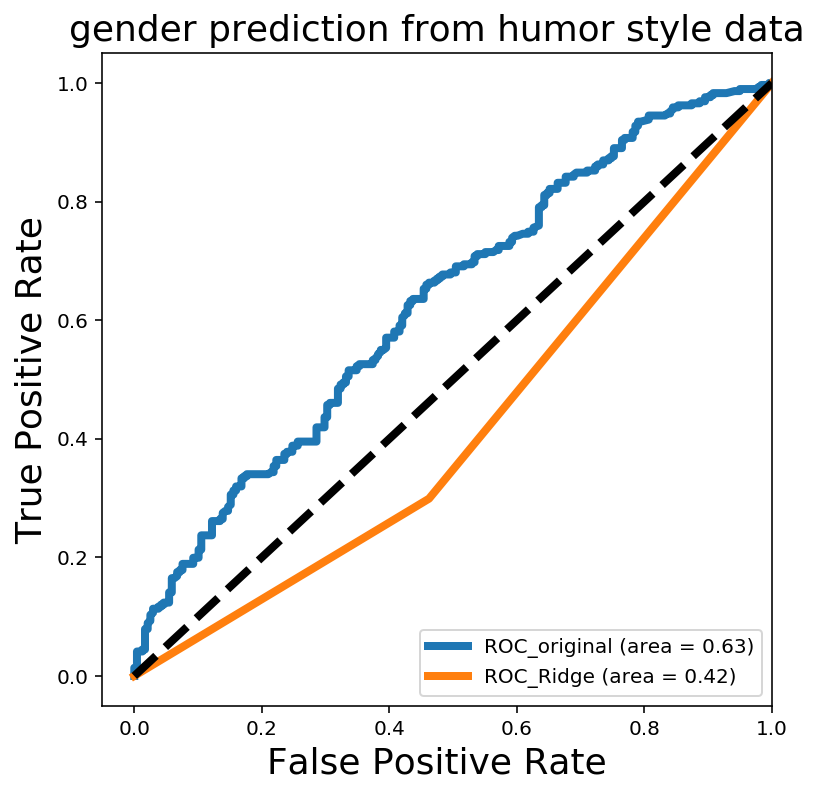

In [32]:
# For class 1, find the area under the curve
fpr_Rlr, tpr_Rlr, threshold = roc_curve(y_test, Y_pp.pred_Rlr, pos_label=1)
roc_auc_Rlr = auc(fpr_Rlr, tpr_Rlr)

# Plot of a ROC curve for class 1 (male)
plt.figure(figsize=[6,6])               # fig, ax = plt.figure(figsize=[6,6])  gives an error!!!
plt.plot(fpr, tpr, fpr_Rlr, tpr_Rlr,linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('gender prediction from humor style data', fontsize=18)
plt.legend(['ROC_original (area = %0.2f)' % roc_auc,'ROC_Ridge (area = %0.2f)' % roc_auc_Rlr], loc="lower right")
plt.show()

In [33]:
#the l2-regularized performs worse than the original

### 11. Cross-validate a Lasso logistic regression.

**Hint:**
- `penalty` must be set to `'l1'`
- `solver` must be set to `'liblinear'`

> **Note:** The lasso penalty can be considerably slower. You may want to try fewer Cs or use fewer cv folds.

In [34]:
Rlr_l1 = LogisticRegressionCV(cv=10,penalty='l1',solver='liblinear')
Rlr_l1.fit(X,y)
Rlr_l1.score(X,y)

0.611531190926276

In [35]:
cross_val_score(Rlr_l1, X, y, cv=4)

array([0.59774436, 0.56439394, 0.60606061, 0.59469697])

### 12. Make the confusion matrix for the Lasso model.

In [36]:
confusion_matrix(y, Rlr_l1.predict(X))

array([[409, 172],
       [239, 238]])

In [37]:
# A:

### 13. Plot all three logistic regression models on the same ROC plot.

Which is the best (if any)?

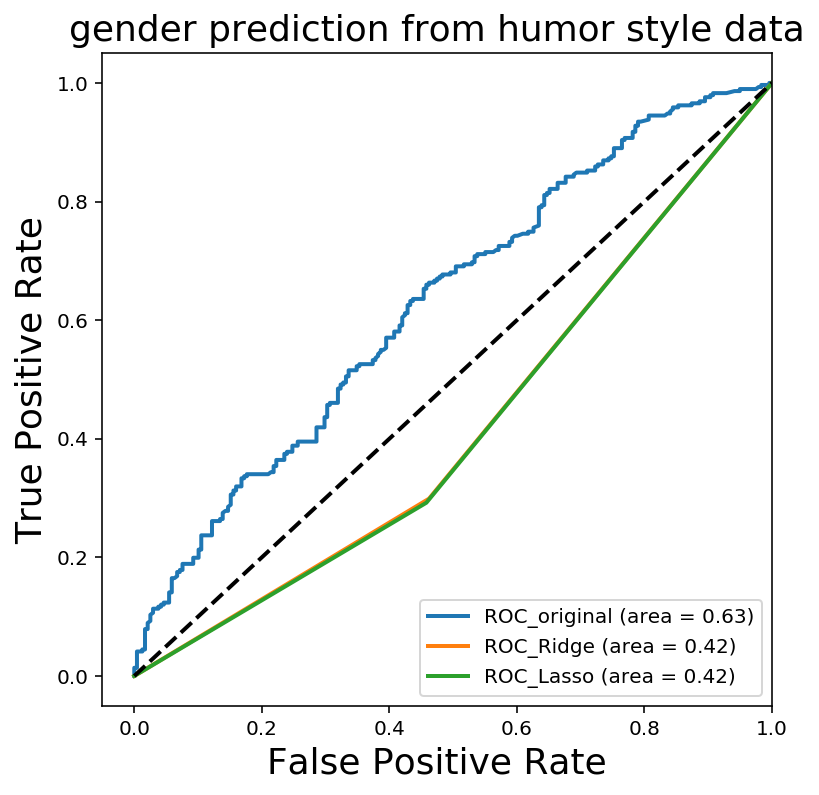

In [38]:
fpr_Rlr_l1, tpr_Rlr_l1, threshold = roc_curve(y_test, Rlr_l1.predict(X_test), pos_label=1)
roc_auc_Rlr_l1 = auc(fpr_Rlr_l1, tpr_Rlr_l1)

# Plot of a ROC curve for class 1 (male)
plt.figure(figsize=[6,6])               # fig, ax = plt.figure(figsize=[6,6])  gives an error!!!
plt.plot(fpr, tpr, fpr_Rlr, tpr_Rlr, fpr_Rlr_l1, tpr_Rlr_l1, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('gender prediction from humor style data', fontsize=18)
plt.legend(['ROC_original (area = %0.2f)' % roc_auc,'ROC_Ridge (area = %0.2f)' % roc_auc_Rlr,
            'ROC_Lasso (area = %0.2f)' % roc_auc_Rlr_l1], loc="lower right")
plt.show()

In [39]:
#the original model works best

### 14. Look at the coefficients for the Lasso logistic regression model. Which variables are the most important?

In [40]:
Rlr_l1.coef_

array([[ 0.0102944 , -0.14660968,  0.25577532, -0.04150236, -0.14863052,
         0.        ]])

In [41]:
# Which variables are the most important?

variables = pd.DataFrame({'feature': features, 'l1_coefficient': Rlr_l1.coef_.ravel() })

variables['|l1_coefficient|'] = abs(variables['l1_coefficient'])

variables.sort_values(by='|l1_coefficient|', ascending=False, inplace=True)

variables

,feature,l1_coefficient,|l1_coefficient|
2,Q15,0.255775,0.255775
4,Q20,-0.148631,0.148631
1,Q11,-0.146610,0.146610
3,Q19,-0.041502,0.041502
0,Q7,0.010294,0.010294
5,Q31,0.000000,0.000000


In [42]:
#the most important feature for predicting the gender is Q15!